In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ytdata.csv',usecols=["Video title", "Video publish time", "Views"])

In [3]:
df.sample(5)

,Video title,Video publish time,Views
58,Python: Combine All Excel Files in a Folder in...,3-Jul-21,8719
29,Automate Excel Reporting Using Python (Real-Li...,9-Oct-21,14713
40,How To Create An Interactive Gantt Diagram In ...,25-Jul-20,15731
38,Compare Two Excel Sheets with Different Number...,3-Apr-22,15348
26,Create and Distribute Excel Files using Python...,6-Nov-21,6170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Video title         107 non-null    object
 1   Video publish time  102 non-null    object
 2   Views               107 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [5]:
# convert the cleaning process into a function
def clean_data(df):
    return (
        df.dropna()
        .assign(date=pd.to_datetime(df["Video publish time"],format='mixed'))
        .set_index("date")
        .sort_index()
    )
clean_df = clean_data(df)
clean_df.head()

,Video title,Video publish time,Views
date,,,
2020-07-05,\uc0\u55357 \u56520 How To Get Stock Data In ...,5-Jul-20,23304
2020-07-18,\uc0\u55357 \u56507 How To Create A GUI In Py...,18-Jul-20,3058
2020-07-25,How To Create An Interactive Gantt Diagram In ...,25-Jul-20,15731
2020-07-27,How To Execute A Python Script From Excel Usin...,27-Jul-20,42471
2020-08-02,How To Create A Treemap & Sunburst Chart In Py...,2-Aug-20,6604


In [6]:
clean_df.Views

date
2020-07-05    23304
2020-07-18     3058
2020-07-25    15731
2020-07-27    42471
2020-08-02     6604
              ...  
2022-08-28     5400
2022-09-03     2143
2022-09-10     4979
2022-09-17     2238
2022-09-24     2221
Name: Views, Length: 102, dtype: int64

<Axes: title={'center': 'Time Series Analysis'}, xlabel='date'>

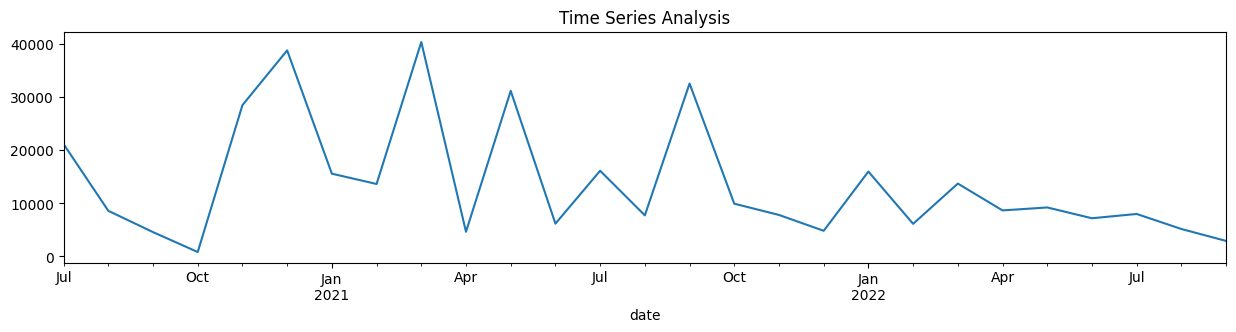

In [18]:
# Plot the data
(clean_df
 .Views
 .clip(upper=150_000)
 .resample("ME")
 .mean()
 .plot(kind='line', figsize=(15,3), title="Time Series Analysis")
)